from sklearn.datasets import make_blobs: Здесь импортируется функция make_blobs из библиотеки Scikit-Learn. Эта функция используется для генерации случайных данных для целей кластеризации.
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50): Эта строка генерирует искусственные данные с помощью функции make_blobs. Параметры функции:
n_samples=200: Количество сгенерированных образцов данных.
n_features=2: Количество признаков (измерений) для каждого образца.
centers=4: Количество центров (кластеров), которые будут созданы.
cluster_std=1.6: Стандартное отклонение (разброс) данных внутри каждого кластера.
random_state=50: Устанавливает начальное значение для генератора случайных чисел, что делает эксперимент воспроизводимым.
points = data[0]: Здесь сохраняются только сами данные (признаки) из сгенерированных данных data. data[0] представляет собой массив с признаками объектов.

In [2]:
# random data generation
from sklearn.datasets import make_blobs
data = make_blobs(n_samples =200, n_features =2, centers=4,
cluster_std =1.6, random_state =50)
points = data [0]
data

(array([[-1.06705283e+00,  9.24306355e+00],
        [ 1.08654318e+00, -6.94815805e+00],
        [-2.30970265e+00,  5.84969440e+00],
        [-1.59728965e+00,  8.45369045e+00],
        [-5.79816711e+00, -3.78405528e+00],
        [-2.29833776e+00, -4.66005371e+00],
        [-1.68210799e+00,  1.12843423e+01],
        [-7.38296450e-01, -5.20135260e+00],
        [-1.92048345e-01, -6.45318764e+00],
        [-6.37920287e+00, -2.17672355e+00],
        [-5.12054803e+00, -2.91449176e+00],
        [-4.22297649e+00,  9.04719945e+00],
        [-2.67815731e+00, -2.32828819e+00],
        [-3.02994109e+00,  1.86959382e+00],
        [-5.73938121e+00, -7.25648845e-01],
        [-1.99427571e+00,  4.28616868e+00],
        [-2.89522086e+00,  1.10222354e+01],
        [-1.11286937e+00,  1.03086380e+01],
        [-5.19987051e+00, -1.59879364e+00],
        [-4.75916597e+00, -1.97047767e+00],
        [-6.76865308e+00, -3.56907573e+00],
        [-2.65715781e+00,  3.33763714e+00],
        [-4.61722463e+00,  1.063

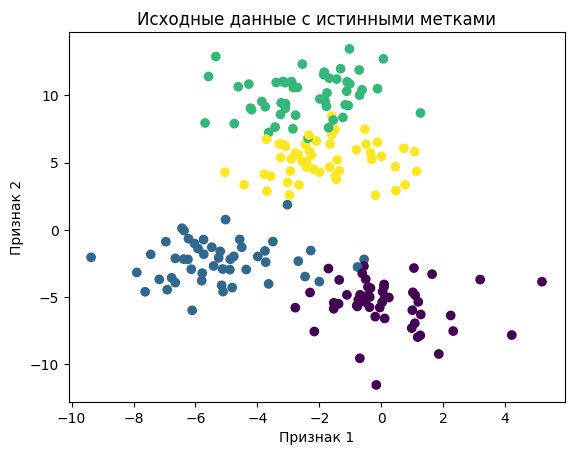

In [4]:
import matplotlib.pyplot as plt
plt.scatter(points[:, 0], points[:, 1], c=data[1], cmap='viridis')
plt.title("Исходные данные с истинными метками")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()

import scipy.cluster.hierarchy as sch: Здесь импортируется модуль hierarchy из библиотеки SciPy для работы с иерархической кластеризацией. Он будет использоваться для построения дендрограммы.

In [5]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

dendrogram = sch.dendrogram(sch.linkage(points, method='ward')): Этот код строит дендрограмму с использованием данных points. Функция sch.linkage выполняет иерархическую кластеризацию данных, а sch.dendrogram строит дендрограмму на основе результатов кластеризации. Метод 'ward' используется для расчета расстояний между кластерами.

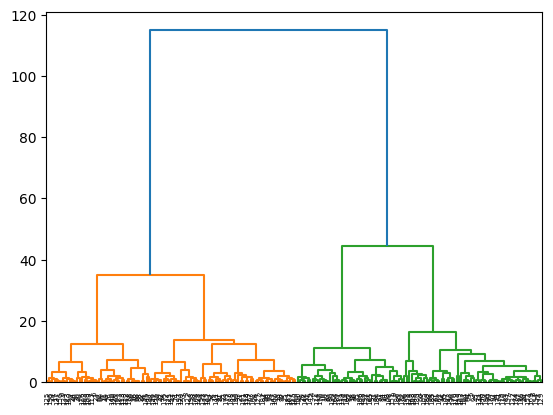

In [6]:
# dendrogram visualization
dendrogram = sch.dendrogram(sch.linkage(points , method='ward'))

hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward'): Здесь создается объект hc класса AgglomerativeClustering для выполнения иерархической кластеризации. Параметры:
n_clusters=4: Задает количество кластеров, на которые будут разделены данные.
affinity='euclidean': Это метрика расстояния между точками, в данном случае, евклидово расстояние.
linkage='ward': Этот параметр определяет метод объединения кластеров.

In [14]:
# clustering
hc = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage = 'ward')

y_hc = hc.fit_predict(points): Этот код выполняет кластеризацию данных с использованием иерархической кластеризации и присваивает каждой точке метку кластера. Метки сохраняются в переменной y_hc.

In [16]:
y_hc = hc.fit_predict(points)
y_hc

array([3, 0, 1, 1, 2, 0, 3, 0, 0, 2, 2, 3, 0, 1, 2, 1, 3, 3, 2, 2, 2, 1,
       3, 3, 3, 1, 3, 0, 1, 3, 3, 2, 2, 0, 0, 2, 2, 2, 1, 1, 3, 2, 1, 1,
       0, 0, 3, 1, 1, 3, 0, 2, 1, 1, 1, 1, 0, 2, 2, 1, 0, 0, 3, 0, 0, 3,
       0, 1, 3, 3, 0, 2, 1, 0, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 3, 0,
       3, 2, 0, 3, 0, 1, 1, 0, 0, 1, 0, 1, 2, 0, 1, 3, 1, 0, 1, 0, 2, 3,
       0, 2, 3, 3, 2, 1, 3, 3, 1, 0, 1, 1, 1, 3, 0, 3, 3, 1, 1, 0, 2, 0,
       0, 1, 3, 1, 0, 3, 3, 2, 3, 1, 1, 0, 2, 3, 0, 1, 0, 2, 3, 2, 1, 0,
       0, 1, 3, 0, 0, 0, 1, 1, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 2, 1, 0, 1,
       2, 0, 3, 1, 0, 1, 1, 3, 2, 0, 2, 3, 1, 0, 1, 1, 2, 1, 0, 3, 2, 1,
       2, 3])

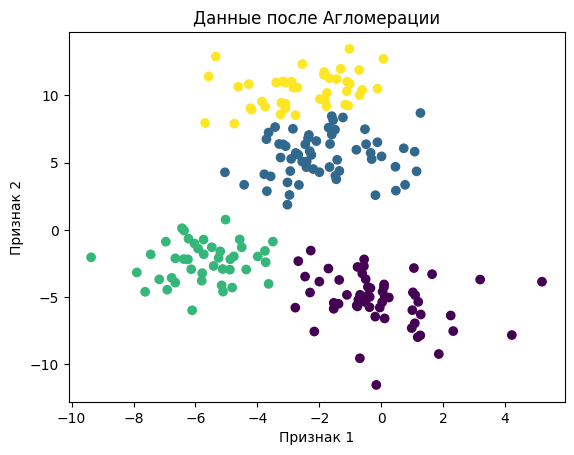

In [18]:
import matplotlib.pyplot as plt
plt.scatter(points[:, 0], points[:, 1], c=y_hc, cmap='viridis')
plt.title("Данные после Агломерации")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()